# Trabajo Semanal 13

In [1]:
from IPython.display import IFrame
IFrame("./TS13.pdf", width=1000, height=1000)

## Punto 1
### Simulación simbólica de $Z_{22}$

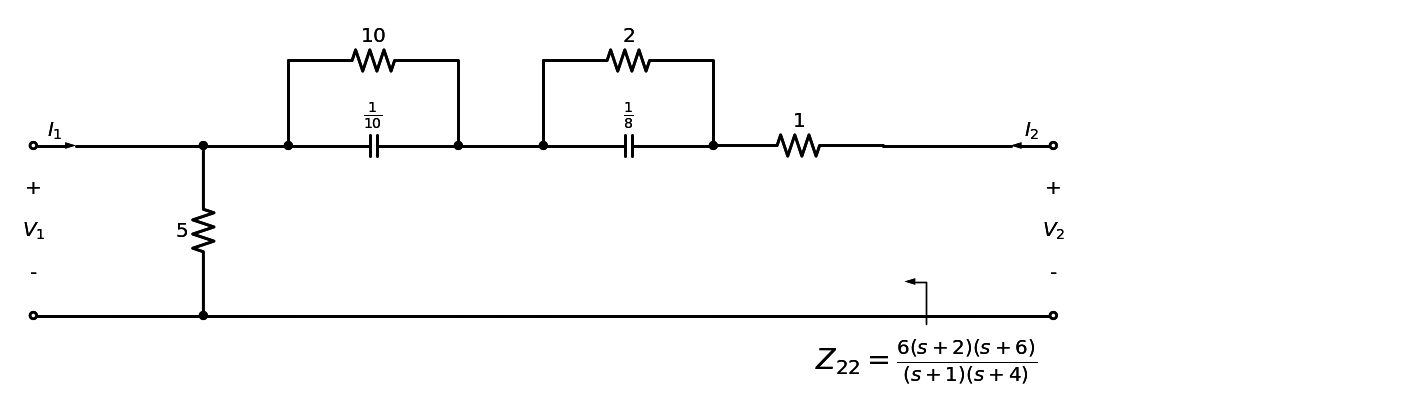

In [2]:
import sys
sys.path.insert(1, 'D:/UTN/Nivel 4/Teoría de los circuitos 2/Repositorio/TC2')  #para poder usar un solo splane.py y no tener que copiar el archivo a todas las carpetas
import splane as tc2

import sympy as sp
import schemdraw
from schemdraw import Drawing
from schemdraw.elements import Capacitor
from schemdraw.elements import Inductor
from schemdraw.elements import Resistor

s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
Z22 = 6*((s+2)*(s+6))/((s+1)*(s+4))

#-I2/I1 tiene ceros en -4 y -1 ==> Al sintentizar Z22 debo remover polos solamente en esos sigmas.

#Remoción parcial de constante en el infinito, no busco ningún valor de cero específico por lo que no uso la función:
RL = 1

ZA = Z22 - RL

#Remoción total de polo en -4:
ZB,K1,R1,C1 = tc2.remover_polo_sigma(ZA, sigma=4, isImpedance=True, isRC=True)

#Remoción total de polo en -1:
ZC,K2,R2,C2 = tc2.remover_polo_sigma(ZB, sigma=1, isImpedance=True, isRC=True)

#Remoción total de constante en el origen de admitancia:

#YC = 1/ZC   =>    YC = 1/R3    =>   R3=ZC
R3 = ZC

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V_1$', '-'), 
                        current_lbl = '$I_1$')

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Resistor, R3)

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_tanque_RC_serie(d, R2, C2)

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)
    
d = tc2.dibujar_tanque_RC_serie(d, R1, C1)

d = tc2.dibujar_elemento_serie(d, Resistor, str(RL))

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z_{22}',  
                                          Z22, 
                                          hacia_salida = False,
                                          k_gap_width = 0.5)

d = tc2.dibujar_puerto_salida(d, 
                        voltage_lbl = ('+', '$V_2$', '-'), 
                        current_lbl = '$I_2$')
display(d)

#### Se ha sintentizado correctamente $Z_{22}$

### Simulación circuital de transferencia de corrientes:

#### Transferencia calculada a partir del circuito sintetizado:
## $\frac{-I_2}{I_1}\big|_{V_2=0}=\frac{5}{6}\frac{S^2+5S+4}{S^2+8S+12}$
##### *(Cumple con la de la consigna)*

#### Circuito simulado con valores calculados analíticamente:

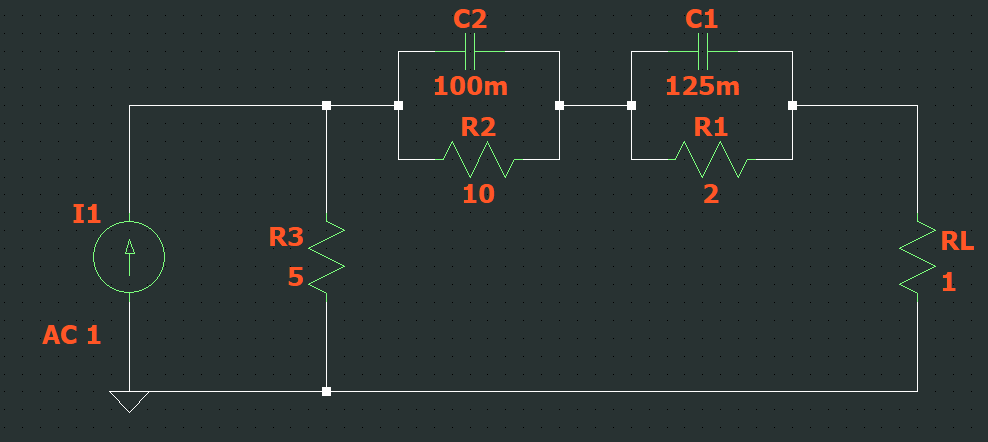

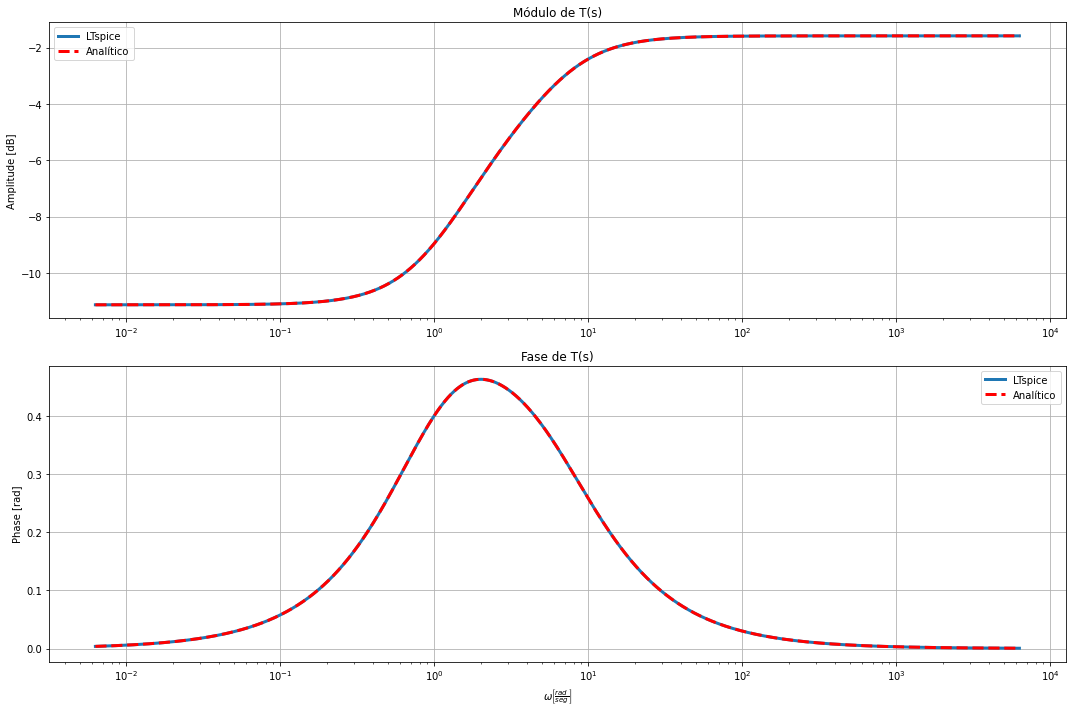

In [3]:
import scipy.signal as sig
import ltspice
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 18})

l = ltspice.Ltspice("./Simulaciones Circuitales/Punto1.raw")
l.parse()

#Obtengo curvas de simulación en ltspice
freq = l.get_frequency()
T_ltspice = l.get_data('I(Rl)') / l.get_data('I(I1)')   #T = -I2/I1 (V2=0)

#Comparo con la función de transferencia obtenida analíticamente
num = 5/6*np.array([1, 5, 4])
den = [1,8,12]
w, T = sig.freqs(num,den,freq*2*np.pi)

fig, axes = plt.subplots(2, 1, figsize=(15,10))
axes[0].set_title("Módulo de T(s)")
axes[0].semilogx(freq*2*np.pi, 20*np.log10(np.abs(T_ltspice)), linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(T)), 'r--', linewidth=3.0, label='Analítico')

axes[1].set_title("Fase de T(s)")
axes[1].semilogx(freq*2*np.pi, np.angle(T_ltspice), linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.angle(T), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

axes[0].legend()
axes[1].legend()

plt.tight_layout()

plt.show() 

#### Se observa que la curva analítica y la simulada con LTspice coinciden, por lo que se verifica correctamente que el circuito calculado cumple con la transferencia solicitada.

## Punto 2

### Simulación simbólica de $Z_{22}$

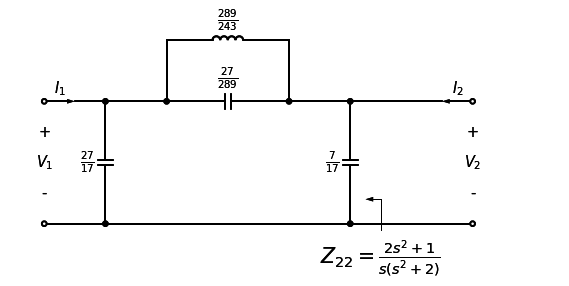

In [4]:
# Sea la siguiente función de excitación
Z22 = (2*s**2+1)/(s*(s**2+2))

#Al sintentizar Z22 debo remover polos solamente en j3 e infinito.

#Remoción parcial de polo en infinito, de admitancia:

YA, K1, C1 = tc2.remover_polo_infinito(1/Z22, omega_zero=3)

#Remoción total de polo en j3, de impedancia:

ZB, K2, L2, C2 = tc2.remover_polo_jw(1/YA, omega = 3, isImpedance=True)

#Remoción total de polo en infinito, de admitancia:

C3 = 1/(ZB * s)

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V_1$', '-'), 
                        current_lbl = '$I_1$')

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C3)

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_tanque_serie(d, L2, C2)

d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_espacio_derivacion(d)

d = tc2.dibujar_elemento_derivacion(d, Capacitor, C1)

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z_{22}',  
                                          Z22, 
                                          hacia_salida = False,
                                          k_gap_width = 0.5)
d = tc2.dibujar_puerto_salida(d, 
                        voltage_lbl = ('+', '$V_2$', '-'), 
                        current_lbl = '$I_2$')
display(d)

#### Se ha sintentizado correctamente $Z_{22}$

### Simulación circuital de transferencia de transimpedancia:

#### Transimpedancia calculada a partir del circuito sintetizado:
## $\frac{V_2}{I_1}=\frac{1}{9}\frac{S^2+9}{S^3+2S^2+2S+1}$
##### *(Cumple con la de la consigna)*

#### Circuito simulado con valores calculados analíticamente:

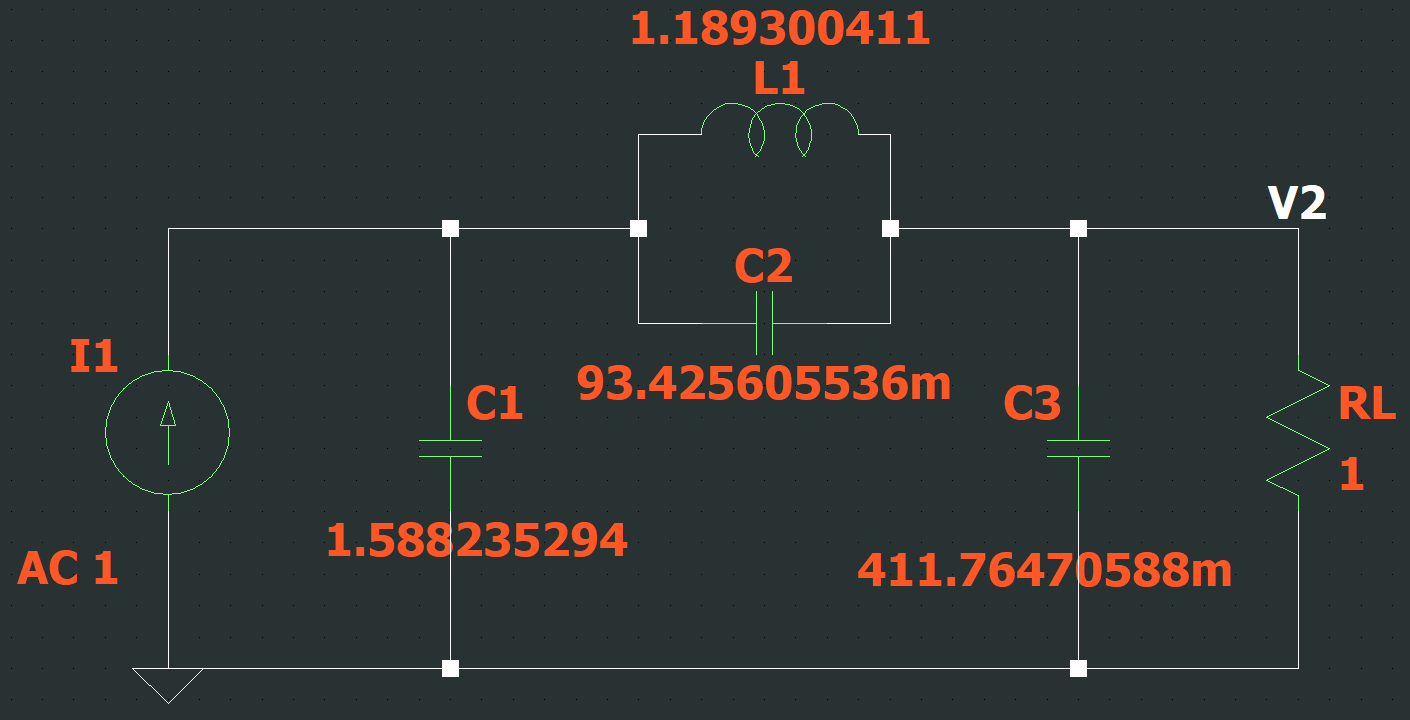

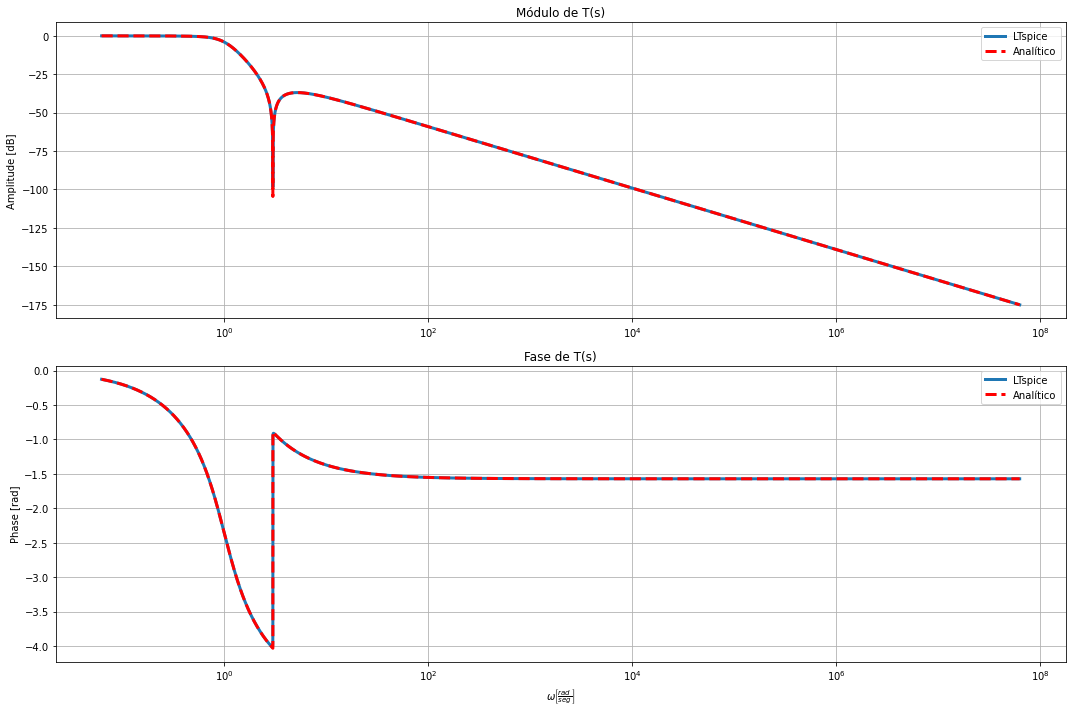

In [5]:
l = ltspice.Ltspice("./Simulaciones Circuitales/Punto2.raw")
l.parse()

#Obtengo curvas de simulación en ltspice

freq = l.get_frequency()
V2 = l.get_data('V(v2)')
I1 = l.get_data('I(I1)')

T_ltspice = V2/I1

#Comparo con la funcion transferencia del enunciado
num = [1/9,0,1]
den = [1,2,2,1]

w, T = sig.freqs(num,den,freq*2*np.pi)

fig, axes = plt.subplots(2, 1, figsize=(15,10))

axes[0].set_title("Módulo de T(s)")
axes[0].semilogx(freq*2*np.pi, 20*np.log10(np.abs(T_ltspice)), linewidth=3.0, label='LTspice')
axes[0].semilogx(w, 20*np.log10(np.abs(T)), 'r--', linewidth=3.0, label='Analítico')

axes[1].set_title("Fase de T(s)")
axes[1].semilogx(freq*2*np.pi, np.unwrap(np.angle(T_ltspice)), linewidth=3.0, label='LTspice')
axes[1].semilogx(w, np.unwrap(np.angle(T)), 'r--', linewidth=3.0, label='Analítico')

axes[0].grid()
axes[1].grid()

axes[1].set_xlabel(r'$\omega \left[\frac{rad}{seg}\right]$')

axes[0].set_ylabel("Amplitude [dB]")
axes[1].set_ylabel("Phase [rad]")

axes[0].legend()
axes[1].legend()

plt.tight_layout()

plt.show() 

#### Se observa que la curva analítica y la simulada con LTspice coinciden, por lo que se verifica correctamente que el cuadripolo LC cargado sintetizado cumple con la transimpedancia solicitada.